# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Data 
## Get data

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

# remove entries with missing values
dataset = raw_dataset.dropna()
# from sklearn import preprocessing
# normalized_features = preprocessing.StandardScaler().fit_transform(dataset)
# dataset = pd.DataFrame(data=normalized_features, columns=column_names) 

## Inspect Data

Dataset shape:
(392, 8)
Tail:
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1  
Statistics:
              count         mean         std     min       25%      50%  \
MPG           392.0    23.445918    7.805007     9.0    17.000    22.75   
Cylinders     392.0     5.471939    1.705783     3.0     4.000     4.00   
Displacement  392.0   194.411990  104.644004    68.0   105.000   151.00   
Horsepower    392.0   104.469388   38.491160    46.0    75.000    93.

/home/jerzy/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


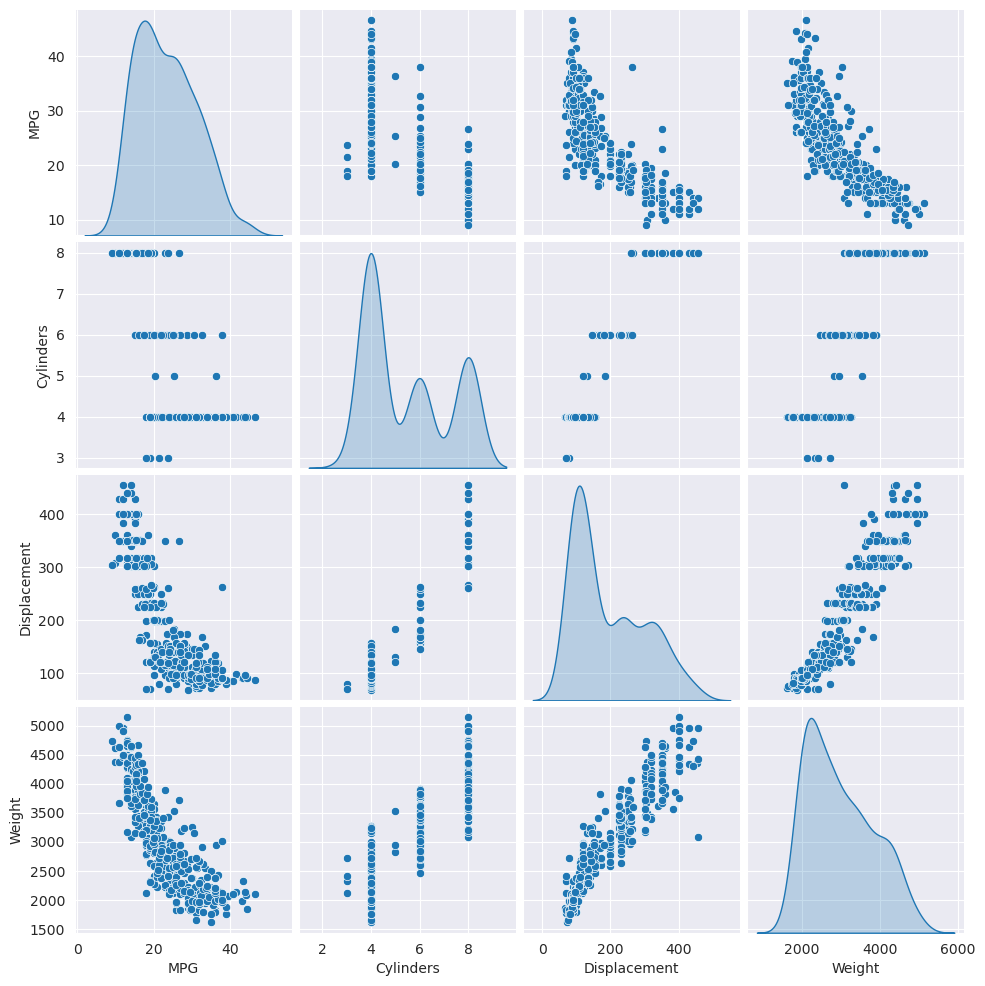

In [3]:
print('Dataset shape:')
print(dataset.shape)

print('Tail:')
print(dataset.tail())

print('Statistics:')
print(dataset.describe().transpose())

sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')
plt.show()

## Split dataset

In [4]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


# Simple Linear Regression
predict MPG (y, dependent variable) using Weight (x, independent variable) using closed-form solution y = theta_0 + theta_1 * x - we want to find theta_0 and theta_1 parameters that minimize the prediction error

We can calculate the error using MSE metric: 
MSE = SUM (from i=1 to n) (actual_output - predicted_output) ** 2

In [5]:
# get the columns
y_train = train_dataset['MPG'].to_numpy()
x_train = train_dataset['Weight'].to_numpy()

y_test = test_dataset['MPG'].to_numpy()
x_test = test_dataset['Weight'].to_numpy()


## Closed-form solution

In [6]:
X = np.c_[np.ones((len(x_train), 1)), x_train]
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_train)
print('Theta:', theta_best)

Theta: [ 4.57612180e+01 -7.50796638e-03]


## Calculate error

In [7]:
def calculate_mse(_theta, _x, _y):
    m = len(_x)
    y_p = _x.dot(_theta)
    return np.sum((y_p - _y) ** 2) / m

X_test = np.c_[np.ones((len(x_test), 1)), x_test]
X_train = np.c_[np.ones((len(x_train), 1)), x_train]

print('MSE for train set:', calculate_mse(theta_best, X_train, y_train))
print('MSE for test set:', calculate_mse(theta_best, X_test, y_test))


MSE for train set: 19.525262560353898
MSE for test set: 15.338692088640183


## Plot the regression line

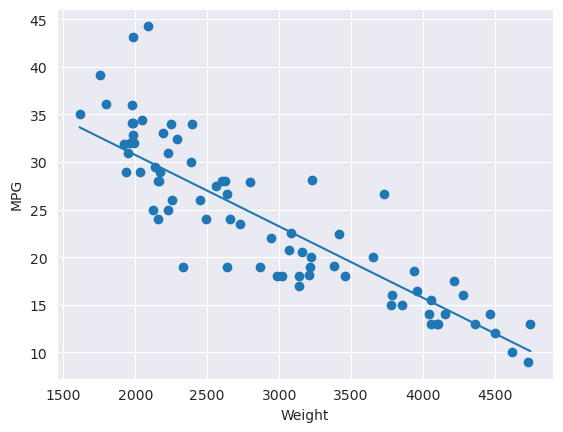

In [8]:
x = np.linspace(min(x_test), max(x_test), 100)
y = float(theta_best[0]) + float(theta_best[1]) * x
plt.plot(x, y)
plt.scatter(x_test, y_test)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

## Standardization

In [9]:
x_standard_deviation = np.std(x_train)
x_average = np.average(x_train)
y_standard_deviation = np.std(y_train)
y_average = np.average(y_train)

x_train_standardized = (x_train - x_average) / x_standard_deviation
y_train_standardized = (y_train - y_average) / y_standard_deviation
x_test_standardized = (x_test - x_average) / x_standard_deviation
y_test_standardized = (y_test - y_average) / y_standard_deviation

X_train_standardized = np.c_[np.ones((len(x_train_standardized), 1)), x_train_standardized]
X_test_standardized = np.c_[np.ones((len(x_test_standardized), 1)), x_test_standardized]
Y_train_standardized = y_train_standardized.reshape(-1, 1)
Y_test_standardized = y_test_standardized.reshape(-1, 1)


## Calculate theta using Batch Gradient Descent

In [10]:
def calculate_mse_gradient(theta, _x, _y):
    m = len(_x) 
    return 2/m * _x.T.dot(_x.dot(theta) - _y)

def calculate_theta_using_batch_gradient_descent(_theta, _x, _y, _eta):
    previous_mse = None
    while True:
        gradients = calculate_mse_gradient(_theta, _x, _y)
        _theta = _theta - _eta * gradients
        current_mse = calculate_mse(_theta, _x, _y)
        if previous_mse is not None and current_mse == previous_mse:
            break
        previous_mse = current_mse
    return _theta

thetas = []
etas = [0.0001, 0.001, 00.1, 0.1]

for eta in etas:
    theta = np.random.randn(2, 1)
    thetas.append(calculate_theta_using_batch_gradient_descent(theta, X_train_standardized, Y_train_standardized, eta))


## Calculate error

In [11]:
for i, theta in enumerate(thetas):
    print('MSE for train set with eta =', etas[i], ':', calculate_mse(theta, X_train_standardized, Y_train_standardized))
    print('MSE for test set with eta =', etas[i], ':', calculate_mse(theta, X_test_standardized, Y_test_standardized))

MSE for train set with eta = 0.0001 : 0.3279251213965803
MSE for test set with eta = 0.0001 : 0.2576121028862658
MSE for train set with eta = 0.001 : 0.32792512139631175
MSE for test set with eta = 0.001 : 0.25761202431666347
MSE for train set with eta = 0.1 : 0.32792512139628727
MSE for test set with eta = 0.1 : 0.2576120269208175
MSE for train set with eta = 0.1 : 0.3279251213962872
MSE for test set with eta = 0.1 : 0.2576120283201755


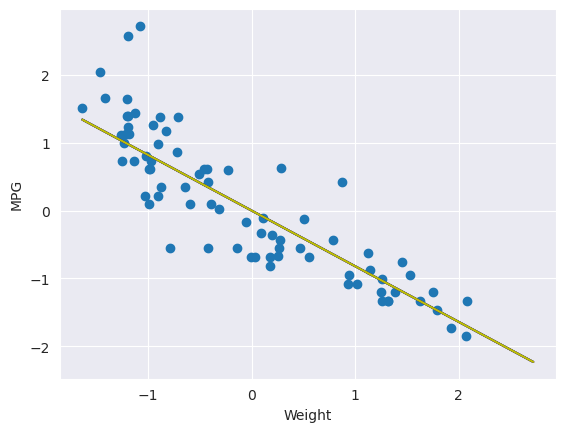

In [12]:
x = np.linspace(min(x_test_standardized), max(y_test_standardized), 100)
colors = ['r', 'g', 'b', 'y']
for i, theta in enumerate(thetas):
    y = float(theta[0]) + float(theta[1]) * x
    plt.plot(x, y, colors[i])
plt.scatter(x_test_standardized, y_test_standardized)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()